In [90]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import psycopg2
import pandas as pd
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder



In [91]:
conn = psycopg2.connect(
    host = "localhost", 
    dbname = "mnrj", 
    user= "postgres", 
    password = "gwdb", 
    port = 5600
)


In [92]:
query = "SELECT * FROM nba;"
data = pd.read_sql(query, conn)
conn.close()

/var/folders/yh/dpxm34q14klby4wqd82k6qcc0000gn/T/ipykernel_60066/3769671571.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [93]:
data.head()
player = "Jayson Tatum"
dataPlayer = data[data['player'] == 'Jayson Tatum']
dataPlayer = dataPlayer.drop(['opponents_points','teammates_points','teammates_rebounds', 'teammates_assists', 'teammates_pr', 'teammates_pa', 'teammates_ar', 'teammates_pra', 
                              'opponents_rebounds', 'opponents_assists', 'opponents_pr', 'opponents_pa', 'opponents_ar', 'opponents_pra',
                             'id', 'player_additional', 'pos', 'player', 'team'],axis=1)
dataPlayer = dataPlayer.dropna()
dataPlayer.head()

,date,age,hoa,opp,gs,mp,fg,fga,fg_percent,twop,...,bpm,plus_minus,result,total_score,p_r_a,p_r,p_a,a_r,month,days_since
1133,2024-04-21,26,0,MIA,1,41,7,18,0.389,6,...,3.1,3.0,1,208,43,33,33,20,4,180
1134,2024-04-24,26,0,MIA,1,41,10,20,0.500,8,...,-0.7,6.0,0,212,39,36,31,11,4,183
1135,2024-04-27,26,1,MIA,1,39,6,16,0.375,4,...,6.5,22.0,1,188,39,33,28,17,4,186
1136,2024-04-29,26,1,MIA,1,37,5,14,0.357,3,...,5.9,12.0,1,190,36,31,25,16,4,188
1137,2024-05-01,26,0,MIA,1,32,4,9,0.444,2,...,3.7,35.0,1,202,31,28,19,15,5,190


In [94]:
encoder = OneHotEncoder()
opp_encoded = encoder.fit_transform(dataPlayer[['opp']]) 

dataPlayer['date'] = pd.to_datetime(dataPlayer['date'])
dataPlayer.set_index('date', inplace=True)
dataPlayer.index = pd.DatetimeIndex(dataPlayer.index).to_period('D')
series = dataPlayer['ast']

In [95]:
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.658486
p-value: 0.000000


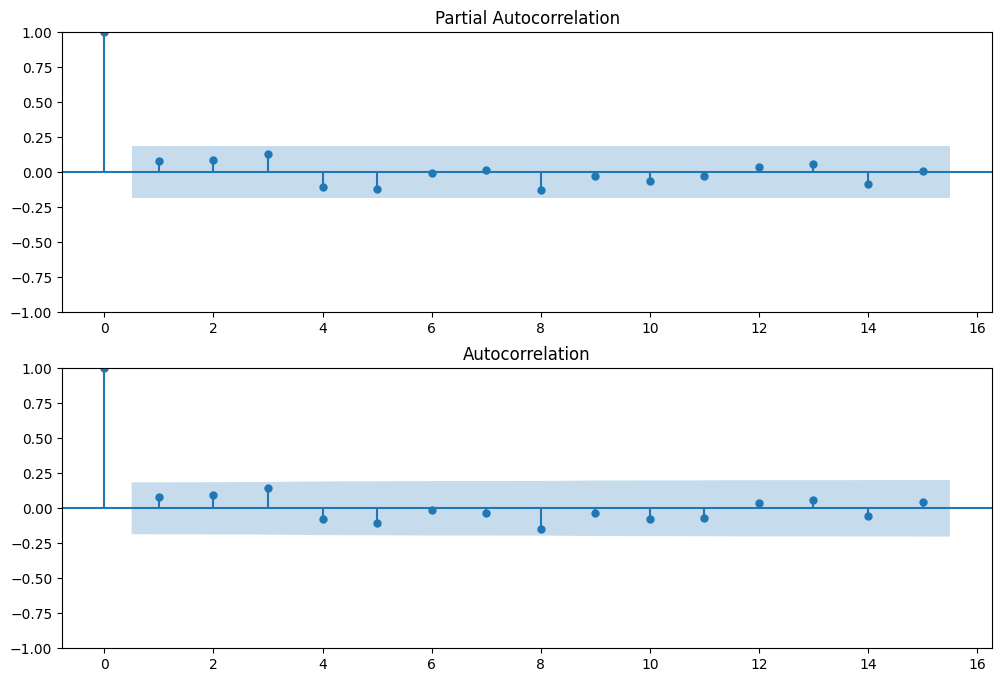

In [96]:
lags = 15  # Number of lags to calculate (you can adjust based on your data size)
pacf_values = pacf(series, nlags=lags)
acf_values = acf(series, nlags=lags)

# Plot PACF and ACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_pacf(series, ax=ax1, lags=lags)  # PACF
plot_acf(series, ax=ax2, lags=lags)  # ACF
plt.show()

In [125]:
d = 0
p = 1
q = 0
opp_encoded = encoder.fit_transform(dataPlayer[['opp']]).toarray()


model = sm.tsa.SARIMAX(series, exog=opp_encoded, order=(25, 0, 20), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters foun

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           75     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87838D+00    |proj g|=  2.97080D+00

At iterate    5    f=  1.93369D+00    |proj g|=  9.55500D-02

At iterate   10    f=  1.86277D+00    |proj g|=  1.31944D-01

At iterate   15    f=  1.83711D+00    |proj g|=  5.97579D-02

At iterate   20    f=  1.80809D+00    |proj g|=  9.02839D-02

At iterate   25    f=  1.79174D+00    |proj g|=  6.71895D-02

At iterate   30    f=  1.77383D+00    |proj g|=  5.51342D-02

At iterate   35    f=  1.74778D+00    |proj g|=  1.85621D-01

At iterate   40    f=  1.73300D+00    |proj g|=  8.92661D-02

At iterate   45    f=  1.70419D+00    |proj g|=  1.65487D-01

At iterate   50    f=  1.68597D+00    |proj g|=  2.42341D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
# Future opponent(s) data
future_opponents = pd.DataFrame({'opp': ['CLE']})  # Replace 'Lakers' with the future opponent name(s)

# Encode using the same encoder
future_opp_encoded = encoder.transform(future_opponents[['opp']]).toarray()


In [128]:
forecast = model_fit.get_forecast(steps=1, exog=future_opp_encoded)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

print("Predicted stat:", forecast_mean.iloc[0])
print("Confidence Interval:")
print(forecast_conf_int)

Predicted stat: 3.8776878268653645
Confidence Interval:
     lower ast  upper ast
112   1.684854   6.070522


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
